# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 3. Load Data

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 10605 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
#Class 1 = Malignant
#Class 0 = Benign
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

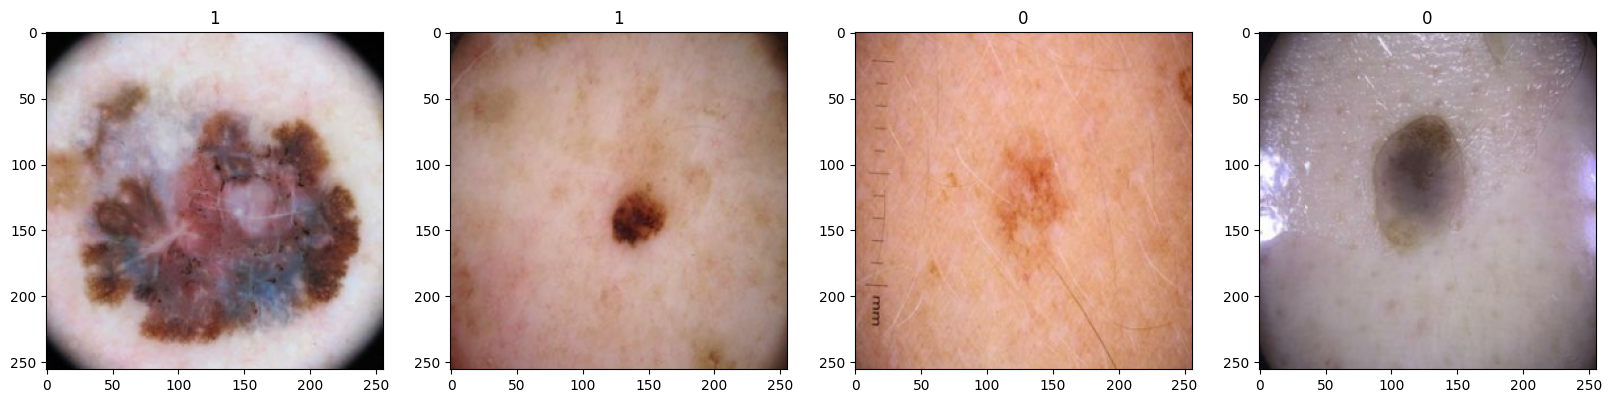

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.7342218 , 0.5492341 , 0.51819855],
          [0.70416164, 0.5109937 , 0.4815207 ],
          [0.69322914, 0.49041054, 0.45343137],
          ...,
          [0.78859746, 0.66534376, 0.66255575],
          [0.7885723 , 0.6670037 , 0.65916055],
          [0.80238134, 0.6808127 , 0.669385  ]],
 
         [[0.7241065 , 0.5372705 , 0.50715905],
          [0.69615525, 0.5029874 , 0.47351432],
          [0.689068  , 0.4862494 , 0.44927022],
          ...,
          [0.79729605, 0.6754878 , 0.6722654 ],
          [0.8064333 , 0.68512535, 0.6772822 ],
          [0.7997604 , 0.6781918 , 0.6667641 ]],
 
         [[0.7123997 , 0.52009803, 0.49235743],
          [0.68983394, 0.49454656, 0.46170342],
          [0.6866841 , 0.4819434 , 0.44159415],
          ...,
          [0.7832783 , 0.66563123, 0.6630802 ],
          [0.81483704, 0.69427943, 0.68730515],
          [0.7965602 , 0.6749916 , 0.6635639 ]],
 
         ...,
 
         [[0.75719976, 0.6395527 , 0.600337  ],
          [0.76280

# 5. Split Data

In [13]:
len(data)

332

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

232

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
from tensorflow.keras import regularizers

model = Sequential()

model.add(Conv2D(
    16, (3,3), 1, activation='relu',
    kernel_regularizer=regularizers.l2(0.001),
    input_shape=(256,256,3)
))
model.add(MaxPooling2D())

model.add(Conv2D(
    32, (3,3), 1, activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(MaxPooling2D())

model.add(Conv2D(
    16, (3,3), 1, activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(
    256, activation='relu',
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(Dropout(0.2))

model.add(Dense(
    1, activation='sigmoid',
    kernel_regularizer=regularizers.l2(0.001)
))

C:\Users\Victus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 92s 386ms/step - accuracy: 0.7973 - loss: 0.5489 - val_accuracy: 0.8916 - val_loss: 0.3339
Epoch 2/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 79s 339ms/step - accuracy: 0.8599 - loss: 0.4011 - val_accuracy: 0.9053 - val_loss: 0.3114
Epoch 3/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 80s 344ms/step - accuracy: 0.8685 - loss: 0.3717 - val_accuracy: 0.8783 - val_loss: 0.3894
Epoch 4/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 105s 454ms/step - accuracy: 0.8710 - loss: 0.3693 - val_accuracy: 0.9010 - val_loss: 0.3015
Epoch 5/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 103s 441ms/step - accuracy: 0.8750 - loss: 0.3509 - val_accuracy: 0.9015 - val_loss: 0.3025
Epoch 6/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 98s 422ms/step - accuracy: 0.8778 - loss: 0.3541 - val_accuracy: 0.9053 - val_loss: 0.2924
Epoch 7/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 107s 460ms/step - accuracy: 0.8815 - loss: 0.3385 - val_accuracy: 0.8949 - val_loss: 0.2990
Epoch 8/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 100s 428ms/step - accuracy: 0.8776 - los

# 8. Plot Performance

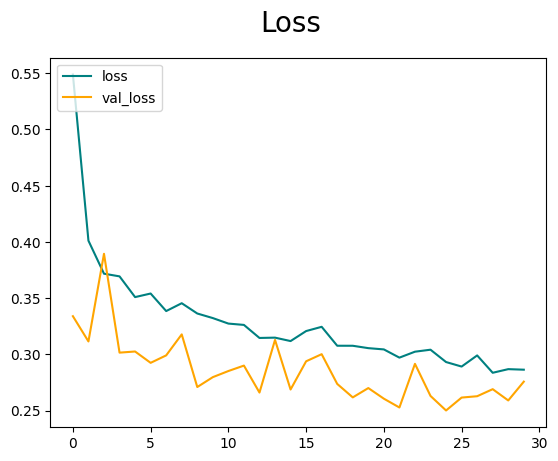

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

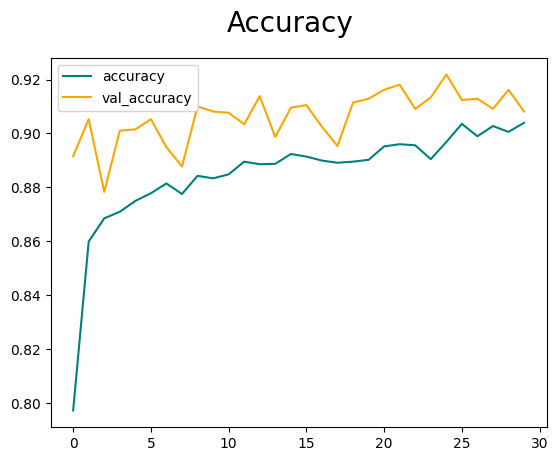

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━

In [31]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8634752035140991, Recall:0.9223484992980957, Accuracy:0.8882575631141663


# 10. Test

In [32]:
import cv2

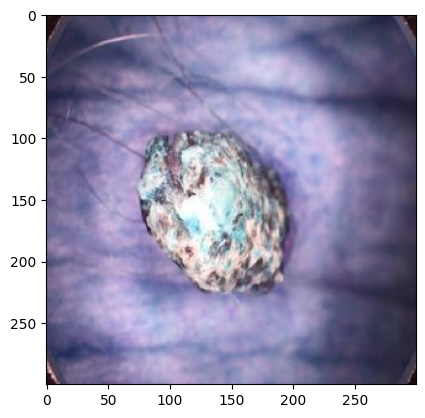

In [35]:
img = cv2.imread('melanoma_860_benign.jpg')
plt.imshow(img)
plt.show()

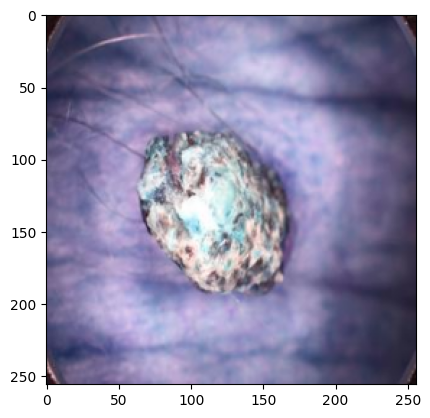

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [38]:
yhat

array([[0.196817]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Benign')
else:
    print(f'Predicted class is Malignant')

Predicted class is Malignant


# 11. Save the Model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','melanomaclassifier.keras'))

In [ ]:
new_model = load_model('models/melanomaclassifier.keras')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))